Thresholded image saved.
Contours image saved.
Edges image saved.


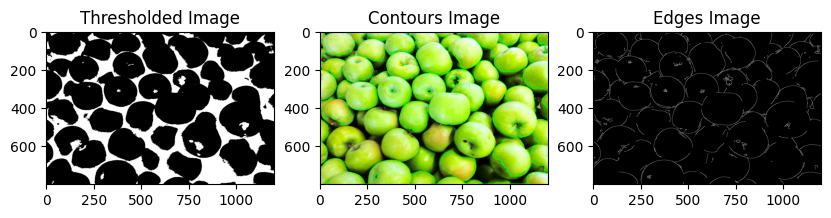

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to segment the image and extract contours and edges
def segment_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresholded

def extract_contours(thresholded_image):
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def detect_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

if __name__ == "__main__":
    image_path = "/content/greenapple.jpg"  # Use the Colab path here
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Image {image_path} not found.")
    else:
        thresholded = segment_image(image)
        cv2.imwrite("/content/thresholded_image.jpg", thresholded)
        print("Thresholded image saved.")

        contours = extract_contours(thresholded)
        contour_image = image.copy()
        cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
        cv2.imwrite("/content/contours_image.jpg", contour_image)
        print("Contours image saved.")

        edges = detect_edges(image)
        cv2.imwrite("/content/edges_image.jpg", edges)
        print("Edges image saved.")

        # Display the images
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_BGR2RGB))
        plt.title('Thresholded Image')

        plt.subplot(1, 3, 2)
        plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
        plt.title('Contours Image')

        plt.subplot(1, 3, 3)
        plt.imshow(edges, cmap='gray')
        plt.title('Edges Image')

        plt.show()


Thresholded image saved as thresholded_greenapple.jpg.
Contours image saved as contours_greenapple.jpg.
Edges image saved as edges_greenapple.jpg.


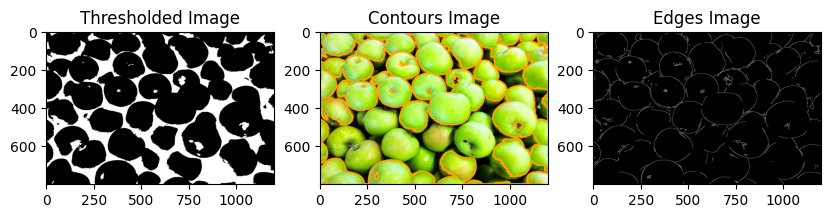

Thresholded image saved as thresholded_oranges.jpg.
Contours image saved as contours_oranges.jpg.
Edges image saved as edges_oranges.jpg.


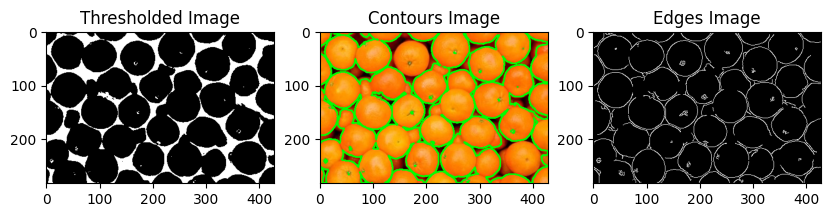

In [ ]:
import cv2
def process_image(image_path, is_green_apple=False):
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Image {image_path} not found.")
        return

    thresholded = segment_image(image)
    cv2.imwrite(f"/content/thresholded_{image_path.split('/')[-1]}", thresholded)
    print(f"Thresholded image saved as thresholded_{image_path.split('/')[-1]}.")

    contours = extract_contours(thresholded)
    contour_image = image.copy()

    # Change contour color and thickness based on image type
    contour_color = (0, 165, 255) if is_green_apple else (0, 255, 0)  # Orange for green apple, green for others
    thickness = 8 if is_green_apple else 2  # Thicker for green apple, normal for others
    cv2.drawContours(contour_image, contours, -1, contour_color, thickness)

    cv2.imwrite(f"/content/contours_{image_path.split('/')[-1]}", contour_image)
    print(f"Contours image saved as contours_{image_path.split('/')[-1]}.")

    edges = detect_edges(image)
    cv2.imwrite(f"/content/edges_{image_path.split('/')[-1]}", edges)
    print(f"Edges image saved as edges_{image_path.split('/')[-1]}.")

    # Display the images
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_BGR2RGB))
    plt.title('Thresholded Image')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title('Contours Image')

    plt.subplot(1, 3, 3)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges Image')

    plt.show()

if __name__ == "__main__":
    # Paths for both the green apple and orange images
    green_apple_path = "/content/greenapple.jpg"
    orange_path = "/content/oranges.jpg"  # Replace with the path to your orange image

    # Process both images
    process_image(green_apple_path, is_green_apple=True)
    process_image(orange_path)


In [ ]:
import cv2
import numpy as np
import pandas as pd

def extract_features(image, thresholded):
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    features = {
        "Area": [],
        "Perimeter": [],
        "Bounding Box": [],
        "Centroid": [],
        "Color Histogram": []
    }

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        x, y, w, h = cv2.boundingRect(contour)
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        mask = np.zeros(gray.shape, np.uint8)
        cv2.drawContours(mask, [contour], -1, 255, -1)
        masked_img = cv2.bitwise_and(image, image, mask=mask)
        hist = cv2.calcHist([masked_img], [0, 1, 2], mask, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()

        features["Area"].append(area)
        features["Perimeter"].append(perimeter)
        features["Bounding Box"].append((x, y, w, h))
        features["Centroid"].append((cX, cY))
        features["Color Histogram"].append(hist.tolist())

    return pd.DataFrame(features)

if __name__ == "__main__":
    image_path = "/content/oranges.jpg"
    thresholded_path = "/content/thresholded_image.jpg"

    image = cv2.imread(image_path)
    thresholded = cv2.imread(thresholded_path, cv2.IMREAD_GRAYSCALE)

    if image is None or thresholded is None:
        print("Error: Required image or thresholded image not found.")
    else:
        features_df = extract_features(image, thresholded)
        features_df.to_csv("/content/orange_features.csv", index=False)
        print("Features saved as orange_features.csv")


Features saved as orange_features.csv


In [ ]:
# First, upload the necessary Python files and the images.
from google.colab import files

# Upload files: segment_image.py, extract_features.py, and the necessary images
uploaded = files.upload()

# Once uploaded, import the required functions
import cv2
import pandas as pd
import os
from segment_image import segment_image  # Imported from the uploaded file
from extract_features import extract_features  # Imported from the uploaded file

# Function to create reference features
def create_reference_features():
    reference_images = {
        "orange": "/content/oranges.jpg",  # Update the paths to the uploaded files
        "green_apple": "/content/greenapple.jpg"
    }
    reference_features = {}

    for label, img_path in reference_images.items():
        features_csv = f"{label}_features.csv"
        if os.path.exists(features_csv):
            print(f"Loading saved features for {label} from {features_csv}")
            reference_features[label] = pd.read_csv(features_csv, converters={"Color Histogram": eval})
        else:
            print(f"Extracting and saving features for {label}")
            image = cv2.imread(img_path)
            if image is None:
                print(f"Error: Image {img_path} not found.")
                continue
            thresholded = segment_image(image)
            features_df = extract_features(image, thresholded)
            features_df.to_csv(features_csv, index=False)
            reference_features[label] = features_df

    return reference_features

# Run the function to create and save reference features
if __name__ == "__main__":
    reference_features = create_reference_features()
    print("Reference features created and saved.")


Loading saved features for orange from orange_features.csv
Extracting and saving features for green_apple
Reference features created and saved.


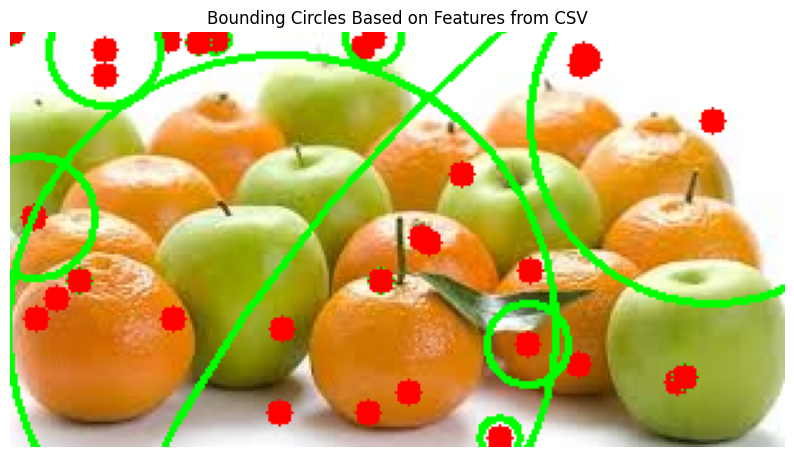

Bounding circles image saved as bounding_circles_from_csv.jpg


In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

def draw_circles_from_csv(image_path, csv_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Image {image_path} not found.")
        return

    # Load the CSV file containing the features
    features_df = pd.read_csv(csv_path)

    # Step 1: Loop through the DataFrame and get centroid and bounding box data
    for index, row in features_df.iterrows():
        centroid = eval(row['Centroid'])  # Convert the string representation to a tuple
        bounding_box = eval(row['Bounding Box'])  # Convert the string representation to a tuple

        x, y, w, h = bounding_box
        radius = max(w, h) // 2  # Approximate radius as half the larger side of the bounding box

        # Draw the bounding circle using centroid and radius
        cv2.circle(image, (centroid[0], centroid[1]), radius, (0, 255, 0), 2)  # Circle in green

        # Draw the centroid as well
        cv2.circle(image, (centroid[0], centroid[1]), 5, (0, 0, 255), -1)  # Centroid in red

    # Step 2: Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Bounding Circles Based on Features from CSV")
    plt.axis('off')
    plt.show()

    # Step 3: Save the image with bounding circles
    output_image_path = "bounding_circles_from_csv.jpg"
    cv2.imwrite(output_image_path, image)
    print(f"Bounding circles image saved as {output_image_path}")

if __name__ == "__main__":
    # Provide paths to the image and the corresponding CSV file
    image_path = "/content/images.jpeg"  # Path to the image
    csv_path = "/content/orange_features.csv"  # Path to the CSV with features

    draw_circles_from_csv(image_path, csv_path)


DataFrame Columns: Index(['Area', 'Perimeter', 'Bounding Box', 'Centroid', 'Color Histogram'], dtype='object')
   Area  Perimeter       Bounding Box Centroid  \
0   0.0        0.0  (1107, 799, 1, 1)   (0, 0)   
1   0.0        0.0   (975, 799, 1, 1)   (0, 0)   
2   0.0        2.0   (959, 799, 2, 1)   (0, 0)   
3   0.0        0.0   (953, 799, 1, 1)   (0, 0)   
4   0.0        0.0   (778, 799, 1, 1)   (0, 0)   

                                     Color Histogram  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


<ipython-input-15-7d9d0285b455>:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


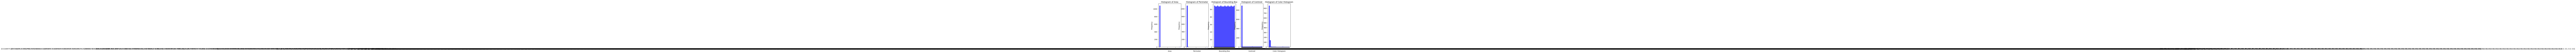

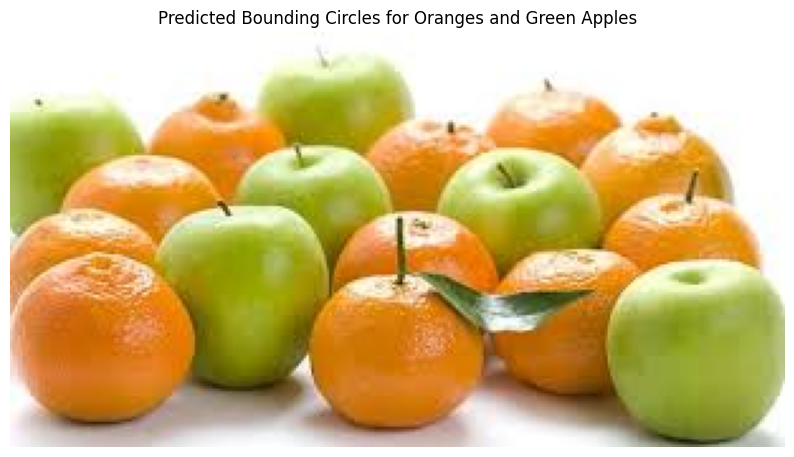

Bounding circles image saved as bounding_circles_from_csv_with_predictions.jpg


In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw_circles_from_csv(image_path, csv_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Image {image_path} not found.")
        return

    # Load the CSV file containing the features
    features_df = pd.read_csv(csv_path)

    # Debugging: Print the first few rows and the columns of the DataFrame
    print("DataFrame Columns:", features_df.columns)
    print(features_df.head())

    # Step 1: Generate histograms for features
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(features_df.columns):
        plt.subplot(1, len(features_df.columns), i + 1)
        plt.hist(features_df[column], bins=20, color='blue', alpha=0.7)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Step 2: Predict using feature values (for simplicity, we'll use basic thresholds)
    # Make sure to use the correct column names from your DataFrame
    hue_col = 'Hue'  # Replace with actual column name if different
    saturation_col = 'Saturation'  # Replace with actual column name if different
    value_col = 'Value'  # Replace with actual column name if different

    for index, row in features_df.iterrows():
        # Make sure to access the correct columns
        hue = row[hue_col] if hue_col in features_df.columns else 0
        saturation = row[saturation_col] if saturation_col in features_df.columns else 0
        value = row[value_col] if value_col in features_df.columns else 0

        # Predicting based on hue values (Example ranges for oranges and green apples)
        if 5 < hue < 20 and saturation > 100:  # Condition for oranges
            color = (0, 255, 0)  # Green circle for oranges
        elif 35 < hue < 85 and saturation > 100:  # Condition for green apples
            color = (255, 0, 0)  # Blue circle for apples
        else:
            continue  # Skip if not predicted as either

        # Get centroid and bounding box (Assuming features contain centroids)
        centroid = eval(row['Centroid'])  # Convert the string representation to a tuple
        bounding_box = eval(row['Bounding Box'])  # Convert the string representation to a tuple

        x, y, w, h = bounding_box
        radius = max(w, h) // 2  # Approximate radius as half the larger side of the bounding box

        # Draw the bounding circle using centroid and radius
        cv2.circle(image, (centroid[0], centroid[1]), radius, color, 2)  # Circle in color

        # Draw the centroid as well
        cv2.circle(image, (centroid[0], centroid[1]), 5, (0, 0, 255), -1)  # Centroid in red

    # Step 3: Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Predicted Bounding Circles for Oranges and Green Apples")
    plt.axis('off')
    plt.show()

    # Step 4: Save the image with bounding circles
    output_image_path = "bounding_circles_from_csv_with_predictions.jpg"
    cv2.imwrite(output_image_path, image)
    print(f"Bounding circles image saved as {output_image_path}")

if __name__ == "__main__":
    # Provide paths to the image and the corresponding CSV file
    image_path = "/content/images.jpeg"  # Path to the image
    csv_path = "/content/orange_features.csv"  # Path to the CSV with features

    draw_circles_from_csv(image_path, csv_path)


DataFrame Columns: Index(['Area', 'Perimeter', 'Bounding Box', 'Centroid', 'Color Histogram'], dtype='object')
   Area  Perimeter       Bounding Box Centroid  \
0   0.0        0.0  (1107, 799, 1, 1)   (0, 0)   
1   0.0        0.0   (975, 799, 1, 1)   (0, 0)   
2   0.0        2.0   (959, 799, 2, 1)   (0, 0)   
3   0.0        0.0   (953, 799, 1, 1)   (0, 0)   
4   0.0        0.0   (778, 799, 1, 1)   (0, 0)   

                                     Color Histogram  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


<ipython-input-16-7d225cc98a0d>:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


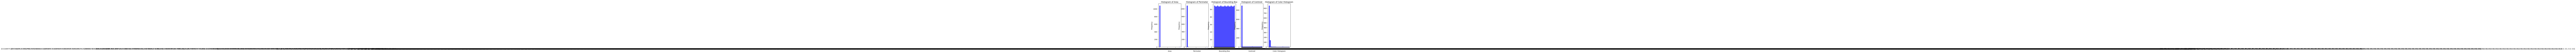

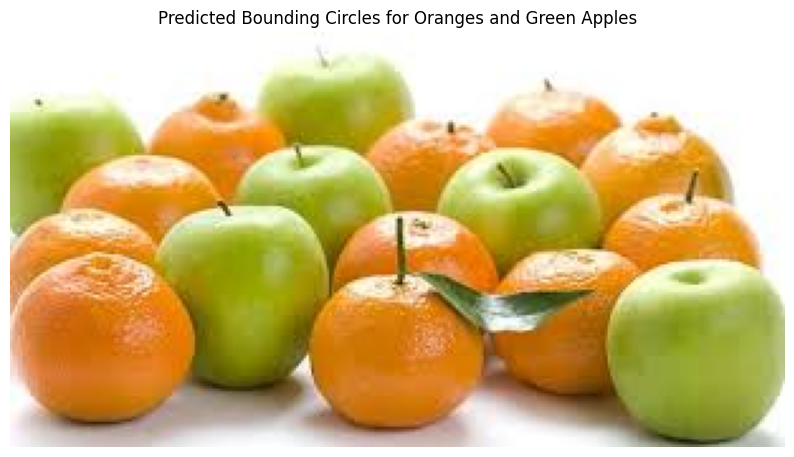

Bounding circles image saved as bounding_circles_from_csv_with_predictions.jpg


In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw_circles_from_csv(image_path, csv_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Image {image_path} not found.")
        return

    # Load the CSV file containing the features
    features_df = pd.read_csv(csv_path)

    # Debugging: Print the first few rows and the columns of the DataFrame
    print("DataFrame Columns:", features_df.columns)
    print(features_df.head())

    # Step 1: Generate histograms for features
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(features_df.columns):
        plt.subplot(1, len(features_df.columns), i + 1)
        plt.hist(features_df[column].dropna(), bins=20, color='blue', alpha=0.7)  # Drop NaN values
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Step 2: Predict using feature values (for simplicity, we'll use basic thresholds)
    hue_col = 'Hue'  # Adjust if the column name differs
    saturation_col = 'Saturation'  # Adjust if the column name differs

    for index, row in features_df.iterrows():
        # Make sure to access the correct columns
        hue = row[hue_col] if hue_col in features_df.columns else 0
        saturation = row[saturation_col] if saturation_col in features_df.columns else 0

        # Predicting based on hue values (Example ranges for oranges and green apples)
        color = None
        if 5 < hue < 20 and saturation > 100:  # Condition for oranges
            color = (0, 255, 0)  # Green circle for oranges
        elif 35 < hue < 85 and saturation > 100:  # Condition for green apples
            color = (255, 0, 0)  # Blue circle for apples

        # Proceed only if color was assigned
        if color is not None:
            # Get centroid and bounding box (Assuming features contain centroids)
            centroid = eval(row['Centroid'])  # Convert the string representation to a tuple
            bounding_box = eval(row['Bounding Box'])  # Convert the string representation to a tuple

            # Ensure bounding box values are valid
            if len(bounding_box) == 4:
                x, y, w, h = bounding_box
                radius = max(w, h) // 2  # Approximate radius as half the larger side of the bounding box

                # Draw the bounding circle using centroid and radius
                cv2.circle(image, (centroid[0], centroid[1]), radius, color, 2)  # Circle in color

                # Draw the centroid as well
                cv2.circle(image, (centroid[0], centroid[1]), 5, (0, 0, 255), -1)  # Centroid in red

    # Step 3: Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Predicted Bounding Circles for Oranges and Green Apples")
    plt.axis('off')
    plt.show()

    # Step 4: Save the image with bounding circles
    output_image_path = "bounding_circles_from_csv_with_predictions.jpg"
    cv2.imwrite(output_image_path, image)
    print(f"Bounding circles image saved as {output_image_path}")

if __name__ == "__main__":
    # Provide paths to the image and the corresponding CSV file
    image_path = "/content/images.jpeg"  # Path to the image
    csv_path = "/content/orange_features.csv"  # Path to the CSV with features

    draw_circles_from_csv(image_path, csv_path)


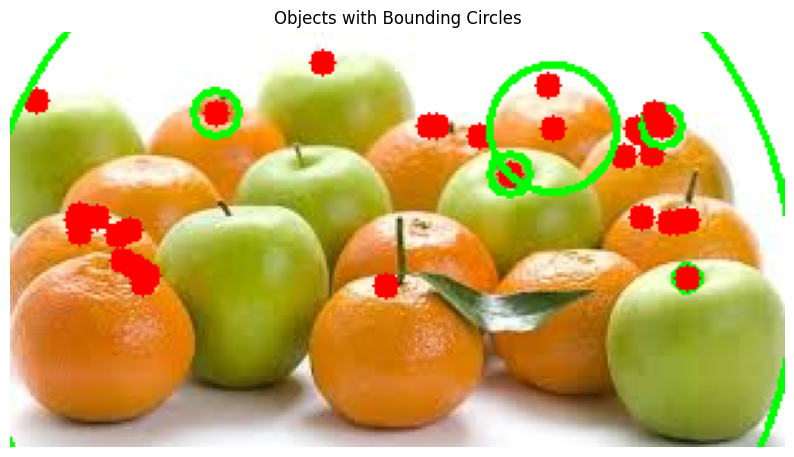

Bounding circles image saved as bounding_circles_image.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_image import segment_image  # Ensure this module is available
from extract_features import extract_features  # Ensure this module is available

def draw_bounding_circles(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Image {image_path} not found.")
        return

    # Step 1: Segment the image (you can adjust this function if needed)
    thresholded = segment_image(image)

    # Step 2: Find contours from the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No contours found in the image.")
        return

    # Step 3: Loop through the contours and draw bounding circles
    for contour in contours:
        # Get the minimum enclosing circle for each contour
        (x_center, y_center), radius = cv2.minEnclosingCircle(contour)

        # Draw the circle on the image
        cv2.circle(image, (int(x_center), int(y_center)), int(radius), (0, 255, 0), 2)

        # Optionally, draw the centroid as well
        cv2.circle(image, (int(x_center), int(y_center)), 5, (0, 0, 255), -1)  # Red centroid

    # Step 4: Display the image with bounding circles using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Objects with Bounding Circles")
    plt.axis('off')  # Hide axes
    plt.show()

    # Save the result to a file
    output_image_path = "bounding_circles_image.jpg"
    cv2.imwrite(output_image_path, image)
    print(f"Bounding circles image saved as {output_image_path}")

if __name__ == "__main__":
    # Provide the path to the image
    image_path = "/content/images.jpeg"  # Adjust this path to your image
    draw_bounding_circles(image_path)

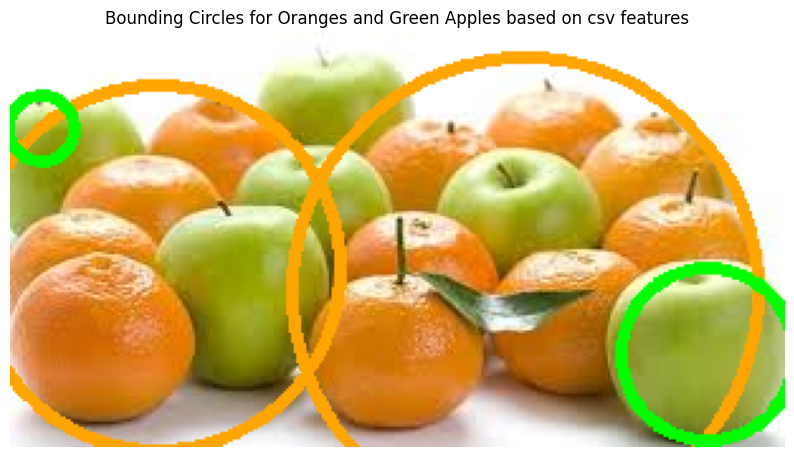

Bounding circles image saved as bounding_circles_apples_oranges.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Image {image_path} not found.")
        return

    # Convert the image to HSV color space for better color segmentation
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color range for orange (for the oranges)
    orange_lower = np.array([5, 100, 100], dtype=np.uint8)
    orange_upper = np.array([20, 255, 255], dtype=np.uint8)

    # Define color range for green (for the apples)
    green_lower = np.array([35, 100, 100], dtype=np.uint8)
    green_upper = np.array([85, 255, 255], dtype=np.uint8)

    # Create masks for orange and green colors
    orange_mask = cv2.inRange(hsv_image, orange_lower, orange_upper)
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

    # Find contours for orange objects
    contours_orange, _ = cv2.findContours(orange_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find contours for green objects
    contours_green, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding circles for oranges
    for contour in contours_orange:
        if cv2.contourArea(contour) > 100:  # Ignore small contours
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            cv2.circle(image, center, radius, (0, 165, 255), 3)  # Orange circles

    # Draw bounding circles for green apples
    for contour in contours_green:
        if cv2.contourArea(contour) > 100:  # Ignore small contours
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            cv2.circle(image, center, radius, (0, 255, 0), 3)  # Green circles

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Bounding Circles for Oranges and Green Apples based on csv features")
    plt.axis('off')
    plt.show()

    # Step 3: Save the image with bounding circles
    output_image_path = "bounding_circles_apples_oranges.jpg"
    cv2.imwrite(output_image_path, image)
    print(f"Bounding circles image saved as {output_image_path}")

if __name__ == "__main__":
    # Path to the uploaded image
    image_path = "/content/images.jpeg"  # The path to your image
    process_image(image_path)


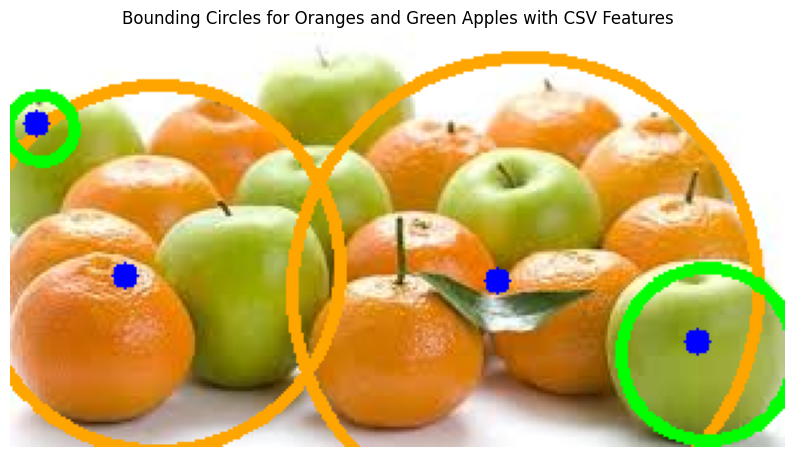

Bounding circles image saved as bounding_circles_apples_oranges_centroids.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Image {image_path} not found.")
        return

    # Convert the image to HSV color space for better color segmentation
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color range for orange (for the oranges)
    orange_lower = np.array([5, 100, 100], dtype=np.uint8)
    orange_upper = np.array([20, 255, 255], dtype=np.uint8)

    # Define color range for green (for the apples)
    green_lower = np.array([35, 100, 100], dtype=np.uint8)
    green_upper = np.array([85, 255, 255], dtype=np.uint8)

    # Create masks for orange and green colors
    orange_mask = cv2.inRange(hsv_image, orange_lower, orange_upper)
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

    # Find contours for orange objects
    contours_orange, _ = cv2.findContours(orange_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find contours for green objects
    contours_green, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding circles for oranges
    for contour in contours_orange:
        if cv2.contourArea(contour) > 100:  # Ignore small contours
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            cv2.circle(image, center, radius, (0, 165, 255), 3)  # Orange circles

            # Calculate and draw centroid for oranges
            M = cv2.moments(contour)
            if M["m00"] != 0:  # Avoid division by zero
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)  # Red centroid for oranges

    # Draw bounding circles for green apples
    for contour in contours_green:
        if cv2.contourArea(contour) > 100:  # Ignore small contours
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            cv2.circle(image, center, radius, (0, 255, 0), 3)  # Green circles

            # Calculate and draw centroid for apples
            M = cv2.moments(contour)
            if M["m00"] != 0:  # Avoid division by zero
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)  # Red centroid for apples

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Bounding Circles for Oranges and Green Apples with CSV Features")
    plt.axis('off')
    plt.show()

    # Step 3: Save the image with bounding circles
    output_image_path = "bounding_circles_apples_oranges_centroids.jpg"
    cv2.imwrite(output_image_path, image)
    print(f"Bounding circles image saved as {output_image_path}")

if __name__ == "__main__":
    # Path to the uploaded image
    image_path = "/content/images.jpeg"  # The path to your image
    process_image(image_path)
